# Modeling and Simulation in Python

Chapter 13

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Code from previous chapters

`make_system`, `plot_results`, and `calc_total_infected` are unchanged.

In [27]:
def make_system(alpha, beta, gamma, delta):
    """Make a system object for the SIR model.
    
    beta: contact rate in days
    gamma: recovery rate in days
    
    returns: System object
    """
    init = State(x = 1, y = 1)

    t0 = 0
    t_end = 400

    return System(init=init, t0=t0, t_end=t_end,
                  alpha=alpha, beta=beta, gamma=gamma, delta=delta)

In [28]:
def plot_results(X, Y):
    """Plot the results of a SIR model.
    
    X: TimeSeries
    Y: TimeSeries
    """
    plot(X, '--', label='Elk')
    plot(Y, '-', label='Wolves')
    decorate(xlabel='Time (days)',
             ylabel='Population')

Here's an updated version of `run_simulation` that uses `unpack`.

In [29]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

**Exercise:** Write a version of `update_func` that uses `unpack`.

In [30]:
# Original

def update_func(state, t, system):
    """Update the SIR model.
    
    state: State (x,y)
    t: time
    system: System object
    
    returns: State (xy)
    """
    X, Y = state
    X += (system.alpha*state.x) - (system.beta*state.x*state.y)
    Y += (system.delta*state.x*state.y) - (system.gamma*state.y)
    
    return State(x=X, y=Y)

In [31]:
system = make_system(0.05, 0.1, 0.1, 0.1)

,values
init,x 1 y 1 dtype: int64
t0,0
t_end,400
alpha,0.05
beta,0.1
gamma,0.1
delta,0.1


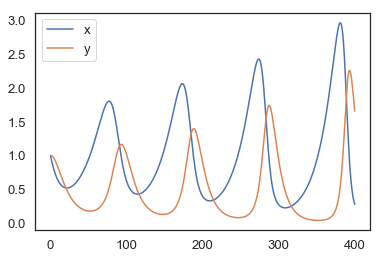

In [32]:
results = run_simulation(system, update_func)
results.plot()